# Task 1.2: Feature Extraction \& Engineering

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [131]:
df = pd.read_csv('../dataset/new_customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313.0,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313.0,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313.0,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313.0,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313.0,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
325452,581585,2011-09-12 12:31:00,1.95,15804.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
325453,581586,2011-09-12 12:49:00,2.95,13113.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8
325454,581586,2011-09-12 12:49:00,1.25,13113.0,23275,SET OF HANGING OWLS OLLIE BEAK,24
325455,581586,2011-09-12 12:49:00,8.95,13113.0,21217,RED RETROSPOT ROUND CAKE TINS,24


In [132]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
dtype: object

In [133]:
df = df.astype({'BasketDate': 'datetime64',
                'BasketID': 'object',
                'CustomerID': 'object'})

## Outliers *Qta*

We identify outliers using the IQR score, the formula is:

- IQR = Q3 - Q1
- lower bound = Q1 - 1.5 * IQR
- upper bound = Q3 + 1.5 * IQR

In [78]:
q1_quan = df['Qta'].quantile(0.25)
q3_quan = df['Qta'].quantile(0.75)
iqr_quan = q3_quan - q1_quan
lb_quan = float(q1_quan) - (1.5 * iqr_quan)
ub_quan = float(q3_quan) + (1.5 * iqr_quan)

print('Q1 = {}'.format(q1_quan))
print('Q3 = {}'.format(q3_quan))
print('IQR = Q3 - Q1 = {}'.format(iqr_quan))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_quan))
print('upper bound = Q3 + 1.5 * IQR = {}'.format(ub_quan))

Q1 = 2.0
Q3 = 12.0
IQR = Q3 - Q1 = 10.0
lower bound = Q1 - 1.5 * IQR = -13.0
upper bound = Q3 + 1.5 * IQR = 27.0


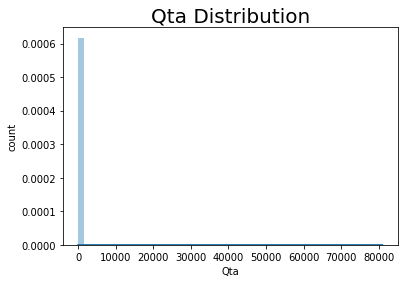

In [79]:
sns.distplot(df['Qta'])
plt.title('Qta Distribution', fontsize=20)
plt.xlabel('Qta')
plt.ylabel('count');

## Outliers *Sale*

In [80]:
q1_unit = df['Sale'].quantile(0.25)
q3_unit = df['Sale'].quantile(0.75)
iqr_unit = q3_unit - q1_unit 
lb_unit = float(q1_unit) - (1.5 * iqr_unit)
ub_unit = float(q3_unit) + (1.5 * iqr_unit)

print('Q1 = {}'.format(q1_unit))
print('Q3 = {}'.format(q3_unit))
print('IQR = Q3 - Q1 = {}'.format(iqr_unit))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_unit))
print('upper bound = Q1 - 1.5 * IQR = {}'.format(ub_unit))

Q1 = 1.25
Q3 = 3.75
IQR = Q3 - Q1 = 2.5
lower bound = Q1 - 1.5 * IQR = -2.5
upper bound = Q1 - 1.5 * IQR = 7.5


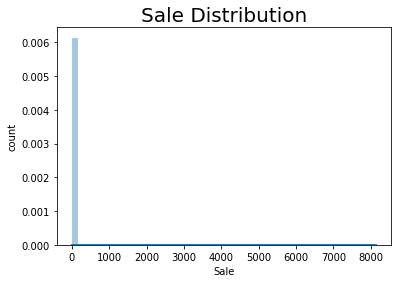

In [81]:
sns.distplot(df['Sale'])
plt.title('Sale Distribution', fontsize=20)
plt.xlabel('Sale')
plt.ylabel('count');

## RFM Analysis

RFM (***Recency***, ***Frequency***, ***Monetary***) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- ***Frequency*** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on;
- ***T*** represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study;
- ***Recency*** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase (thus if they have made only 1 purchase, the recency is 0);
- ***Monetary*** represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

We will create those 3 customer attributes for each customer.

In [134]:
from lifetimes.utils import summary_data_from_transaction_data

In [135]:
df['TotalSale'] = df['Qta'] * df['Sale']
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta,TotalSale
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10,19.5
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25,10.5
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25,10.5
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5,10.5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10,12.5
...,...,...,...,...,...,...,...,...
325452,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,23.4
325453,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8,23.6
325454,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24,30.0
325455,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24,214.8


In [136]:
rfm = summary_data_from_transaction_data(df, 'CustomerID', 'BasketDate', monetary_value_col='TotalSale')
rfm.rename(columns={'monetary_value': 'monetary'}, inplace=True)
rfm

,frequency,recency,T,monetary
CustomerID,,,,
12346.0,0.0,0.0,326.0,0.000000
12747.0,8.0,318.0,341.0,397.370000
12748.0,98.0,335.0,340.0,280.474592
12749.0,3.0,313.0,336.0,731.583333
12820.0,3.0,282.0,327.0,257.293333
...,...,...,...,...
18280.0,0.0,0.0,160.0,0.000000
18281.0,0.0,0.0,4.0,0.000000
18282.0,1.0,85.0,301.0,100.210000


In [137]:
one_time_buyers = round(sum(rfm['frequency'] == 0) / float(len(rfm)) * (100), 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 37.18 %


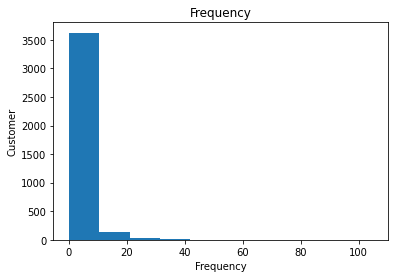

In [138]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Customer' )
plt.xlabel('Frequency');

In [139]:
rfm = rfm[rfm['frequency'] > 0]
rfm

,frequency,recency,T,monetary
CustomerID,,,,
12747.0,8.0,318.0,341.0,397.370000
12748.0,98.0,335.0,340.0,280.474592
12749.0,3.0,313.0,336.0,731.583333
12820.0,3.0,282.0,327.0,257.293333
12822.0,1.0,17.0,88.0,257.980000
...,...,...,...,...
18272.0,5.0,223.0,226.0,547.572000
18273.0,2.0,107.0,258.0,76.500000
18282.0,1.0,85.0,301.0,100.210000


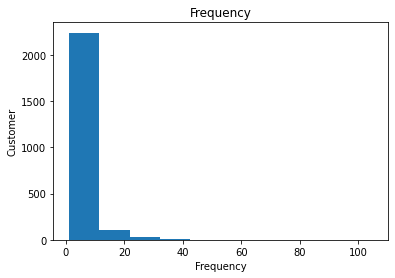

In [140]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Customer' )
plt.xlabel('Frequency');

Now we change the distribution of monetary value with a histogram:

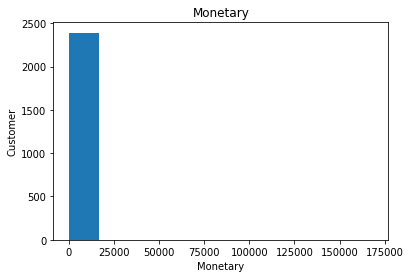

In [141]:
plt.hist(rfm['monetary'])
plt.title('Monetary')
plt.ylabel('Customer', )
plt.xlabel('Monetary');

In [142]:
rfm.corr()

,frequency,recency,T,monetary
frequency,1.000000,0.451347,0.324547,0.008334
recency,0.451347,1.000000,0.750268,-0.000059
T,0.324547,0.750268,1.000000,-0.000573
monetary,0.008334,-0.000059,-0.000573,1.000000


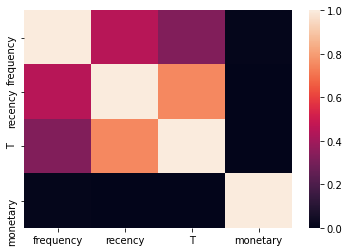

In [143]:
sns.heatmap(rfm.corr())

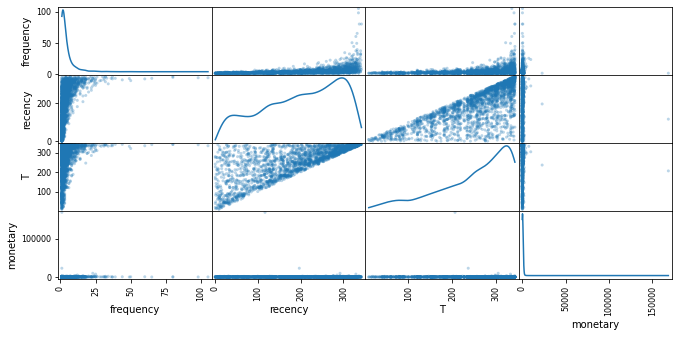

In [144]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(rfm, alpha=0.3, figsize=(11,5), diagonal='kde');

We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

### Data Normalization

In [145]:
# log transformation
log_rfm = pd.DataFrame({'monetary': np.log(rfm['recency'] + 0.1), # can't take log(0) and so add a small number
                        'recency': np.log(rfm['frequency']),
                        'T': np.log(rfm ['T']),
                        'frequency': np.log(rfm['monetary'] + 0.1)})
log_rfm

,monetary,recency,T,frequency
CustomerID,,,,
12747.0,5.762366,2.079442,5.831882,5.985119
12748.0,5.814429,4.584967,5.828946,5.636840
12749.0,5.746523,1.098612,5.817111,6.595348
12820.0,5.642262,1.098612,5.789960,5.550605
12822.0,2.839078,0.000000,4.477337,5.553270
...,...,...,...,...
18272.0,5.407620,1.609438,5.420535,6.305677
18273.0,4.673763,0.693147,5.552960,4.338597
18282.0,4.443827,0.000000,5.707110,4.608265


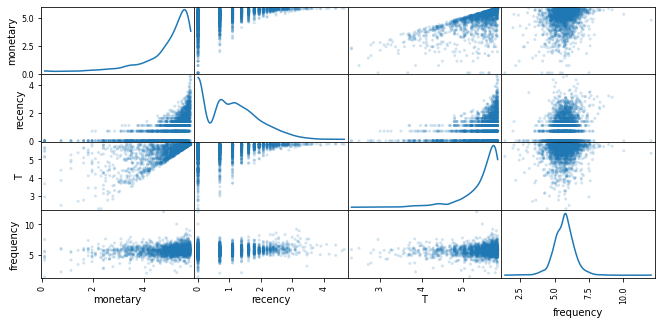

In [146]:
# produce a scatter matrix for each pair of features in the data
scatter_matrix(log_rfm, alpha=0.2, figsize=(11,5), diagonal='kde');

In [147]:
log_rfm.corr()

,monetary,recency,T,frequency
monetary,1.000000,0.554395,0.677053,0.194677
recency,0.554395,1.000000,0.404625,0.202890
T,0.677053,0.404625,1.000000,0.125148
frequency,0.194677,0.202890,0.125148,1.000000


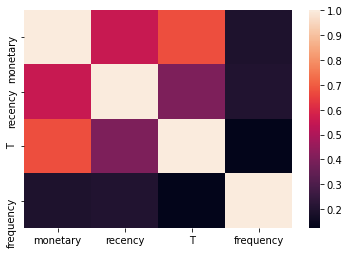

In [148]:
sns.heatmap(log_rfm.corr())

### RFM Score

Calculating the individual RFM Score can be done in several ways, you can calculate it using your own business calculation formula that roughly matches your customer base. This time we will use the quartil statistical method, i.e. dividing Score into four parts:

In [149]:
quantiles = log_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,monetary,recency,T,frequency
0.25,4.728272,0.000000,5.323010,5.241870
0.50,5.293807,0.693147,5.613128,5.725883
0.75,5.624378,1.609438,5.762051,6.120297


In [150]:
# Arguments (x=value, p=recency, monetary, frequency, d=quartiles)
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x=value, p=recency, monetary, frequency, k=quartiles)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [151]:
# create RFM segmentation table
log_rfm['R'] = log_rfm['recency'].apply(RScore, args=('recency', quantiles,))
log_rfm['F'] = log_rfm['frequency'].apply(FMScore, args=('frequency', quantiles,))
log_rfm['M'] = log_rfm['monetary'].apply(FMScore, args=('monetary', quantiles,))
log_rfm

,monetary,recency,T,frequency,R,F,M
CustomerID,,,,,,,
12747.0,5.762366,2.079442,5.831882,5.985119,1,3,4
12748.0,5.814429,4.584967,5.828946,5.636840,1,2,4
12749.0,5.746523,1.098612,5.817111,6.595348,2,4,4
12820.0,5.642262,1.098612,5.789960,5.550605,2,2,4
12822.0,2.839078,0.000000,4.477337,5.553270,4,2,1
...,...,...,...,...,...,...,...
18272.0,5.407620,1.609438,5.420535,6.305677,2,4,3
18273.0,4.673763,0.693147,5.552960,4.338597,3,1,1
18282.0,4.443827,0.000000,5.707110,4.608265,4,1,1


After the individual scores have been obtained, it is time to calculate the overall RFM score:

In [152]:
log_rfm['RFMScore'] = log_rfm[['R', 'F', 'M']].sum(axis=1)
log_rfm

,monetary,recency,T,frequency,R,F,M,RFMScore
CustomerID,,,,,,,,
12747.0,5.762366,2.079442,5.831882,5.985119,1,3,4,8
12748.0,5.814429,4.584967,5.828946,5.636840,1,2,4,7
12749.0,5.746523,1.098612,5.817111,6.595348,2,4,4,10
12820.0,5.642262,1.098612,5.789960,5.550605,2,2,4,8
12822.0,2.839078,0.000000,4.477337,5.553270,4,2,1,7
...,...,...,...,...,...,...,...,...
18272.0,5.407620,1.609438,5.420535,6.305677,2,4,3,9
18273.0,4.673763,0.693147,5.552960,4.338597,3,1,1,5
18282.0,4.443827,0.000000,5.707110,4.608265,4,1,1,6


### Saving the RFM model

In [153]:
log_rfm.to_csv('../dataset/rfm_customer_supermarket_model.csv', sep='\t')